# 1. 模块与数据准备

In [1]:
#1.1 加载模块
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from itertools import cycle

from sklearn import model_selection

from sklearn import metrics

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import neighbors

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_curve, auc

import torch
import torch.utils.data as Data
import torch.nn.functional as F

import statsmodels.formula.api as smf

import warnings 
warnings.filterwarnings('ignore')

plt.rc('font', family='SimHei')

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

#1.3 读取数据
userinfo = pd.read_csv('TeleComm_User_Info.txt', encoding = 'gb18030')
target_data = userinfo[userinfo['客户类型']=='公众客户']  #根据题目要求找到公众客户对象
target_data = target_data.drop('客户类型',axis=1)  #从筛选过后的表删去客户类型属性列

print("row:",target_data.shape[0],"column:",target_data.shape[1])
print(list(target_data))

row: 8846 column: 22
['用户ID', '性别', '年龄', '归属地', '在网时长', '换机频率', '终端品牌', '终端类型', '最近使用操作系统偏好', '入网渠道类型', '渠道类型描述', '上网流量使用', '漫游流量使用', '总收入', '增值收入', '流量收入', '短信收入', '彩信收入', '语音收入', '是否欠费', '产品大类', '产品分类']


# 2. 数据前期处理

## 2.1 客户各类变量分布查看

In [2]:
##2.1.1 查看每个变量缺失的数据数目及比例: 删除所有缺失值
na_num=target_data.isnull().sum()
na_num=na_num[na_num!=0]
na_percent=target_data.isnull().sum()/target_data.shape[0]
na_percent=na_percent[na_percent!=0]
na={"na_num": na_num,"na_percent": na_percent}
na=pd.DataFrame(na)
na

,na_num,na_percent
年龄,66,0.007461
换机频率,1,0.000113
终端品牌,457,0.051662
终端类型,4,0.000452
最近使用操作系统偏好,988,0.111689
入网渠道类型,1,0.000113
渠道类型描述,1,0.000113
上网流量使用,1,0.000113
漫游流量使用,1,0.000113
总收入,1,0.000113


In [3]:
#2.1.2 查看分类变量各类别的数量:
##性别:：删除无法区分
pd.DataFrame(target_data.groupby(['性别']).size()).sort_values(0, axis=0)

,0
性别,
无法区分,66
女,3114
男,5666


In [4]:
##归属地：均保留
pd.DataFrame(target_data.groupby(['归属地']).size()).sort_values(0, axis=0)

,0
归属地,
衡水,151
张家口,168
秦皇岛,174
廊坊,200
承德,210
邢台,214
唐山,239
沧州,276
邯郸,335


In [5]:
##换机频率：均保留
pd.DataFrame(target_data.groupby(['换机频率']).size()).sort_values(0, axis=0)

,0
换机频率,
从不换机型,10
偶尔换机型,62
频繁换机型,8773


In [6]:
##终端品牌：将人数1-5归为稀有品牌 人数6-10归为小众品牌，其余保持不变
pd.DataFrame(target_data.groupby(['终端品牌']).size()).sort_values(0, axis=0)

,0
终端品牌,
奥魅尔,1
诺菲世纪,1
摩天时代,1
振华,1
惠普,1
恒语,1
心爱,1
德赛,1
读书郎,1


In [7]:
##终端类型：删去0
pd.DataFrame(target_data.groupby(['终端类型']).size()).sort_values(0, axis=0)

,0
终端类型,
0,370
2G,1302
3G,1775
4G,5395


In [8]:
##最近使用操作系统偏好：将Android归为一类，IOS归为一类，剩下的归为一类
pd.DataFrame(target_data.groupby(['最近使用操作系统偏好']).size()).sort_values(0, axis=0)

,0
最近使用操作系统偏好,
ANDROID 4.0.1,1
ANDROID_2.3.4,1
ANDROID2.3,1
ANDROID 4.0.3,3
ANDROID 4.1,4
BLACKBERRY,4
ANDROID 2.3.5,5
WINDOWS PHONE 8.1,7
IOS 5.1,7


In [9]:
##入网渠道类型：与渠道类型描述完全一致，故删去
pd.DataFrame(target_data.groupby(['入网渠道类型']).size()).sort_values(0, axis=0)

,0
入网渠道类型,
99.0,49
1.0,3988
2.0,4808


In [10]:
##渠道类型描述：删去其他渠道
pd.DataFrame(target_data.groupby(['渠道类型描述']).size()).sort_values(0, axis=0)

,0
渠道类型描述,
其他渠道,49
自有渠道,3988
社会渠道,4808


In [11]:
##是否欠费
pd.DataFrame(target_data.groupby(['是否欠费']).size()).sort_values(0, axis=0)

,0
是否欠费,
是,924
否,7921


In [12]:
##产品大类：均保留
pd.DataFrame(target_data.groupby(['产品大类']).size()).sort_values(0, axis=0)

,0
产品大类,
共享自由组合,5
4G本地迁转套餐,20
校园专属-沃派,33
校园专属-小区A套餐,34
校园专属-小区基本套餐,34
校园专属-非小区基本套餐,99
校园专属-非小区B套餐,231
校园专属-非小区A套餐,254
4G本地行业套餐,361


In [13]:
##产品分类：将人数1-5归为稀有套餐 人数6-10归为小众套餐，其余保持不变
pd.DataFrame(target_data.groupby(['产品分类']).size()).sort_values(0, axis=0)

,0
产品分类,
集客4G本地行业套餐-智慧党建9元套餐（冀）,1
集客4G本地行业套餐-智慧党建16元套餐（冀）,1
4G本地语音套餐-18元套餐,1
智慧沃家共享套餐-全国流量包199.9元8GB,1
智慧沃家共享套餐-全国流量包239.9元12GB,1
199.9元8G自由组合共享套餐国内流量包,1
集客4G本地行业套餐-100元套餐,1
智慧沃家共享套餐-全国流量包159.9元6GB,2
4G全国套餐-56元套餐,2


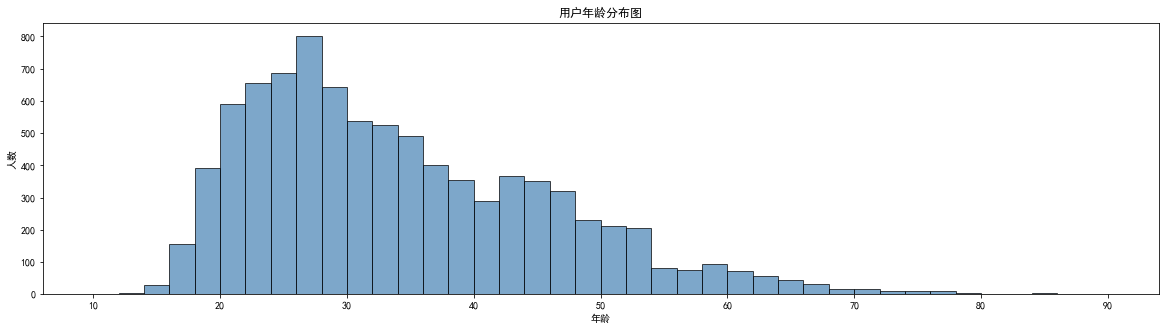

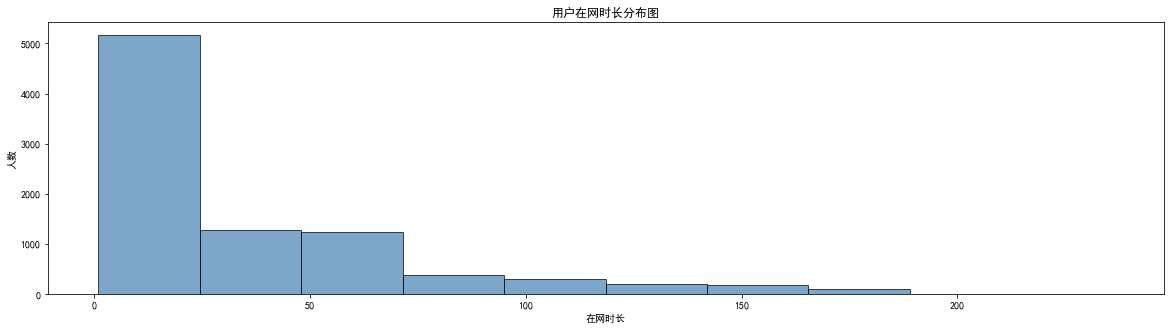

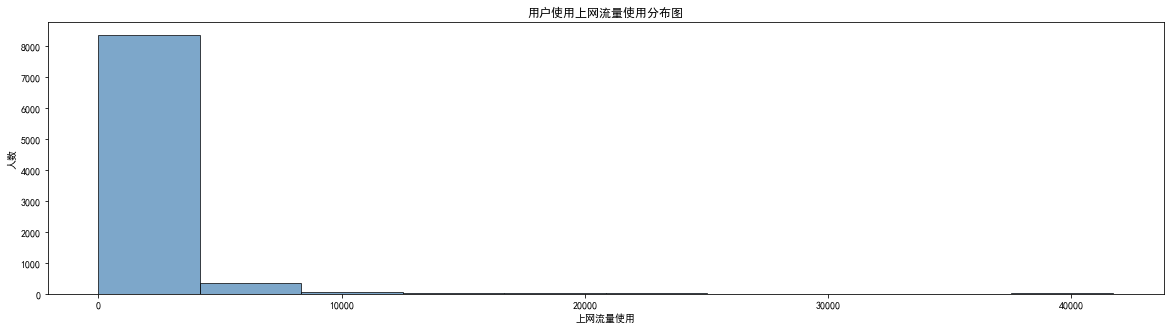

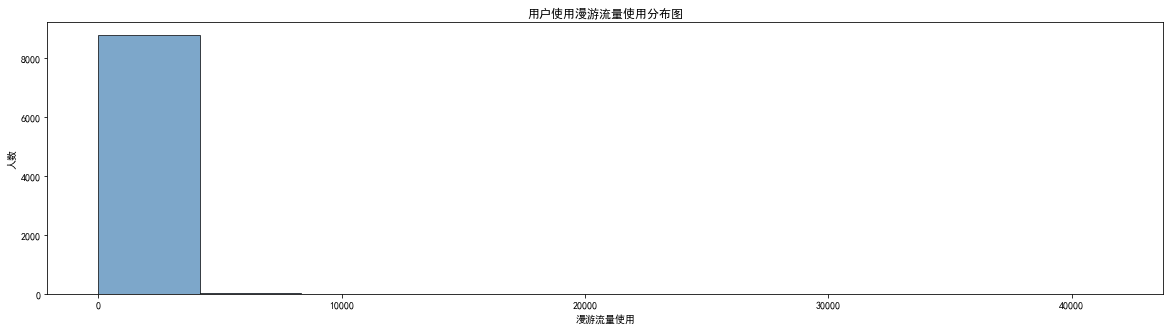

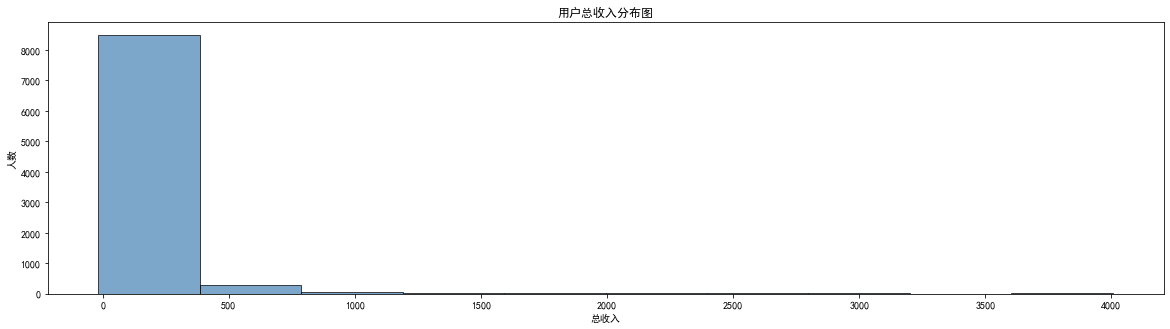

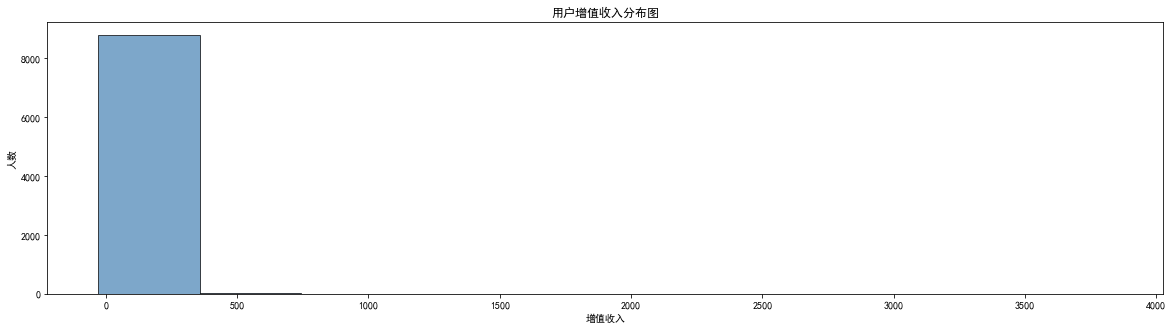

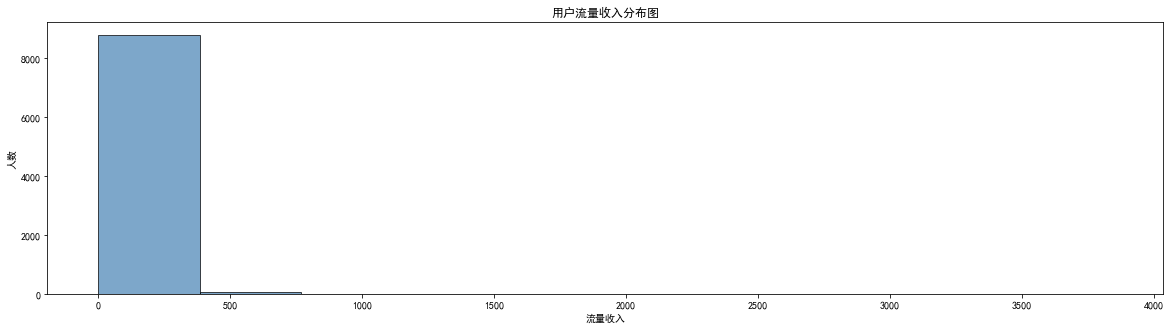

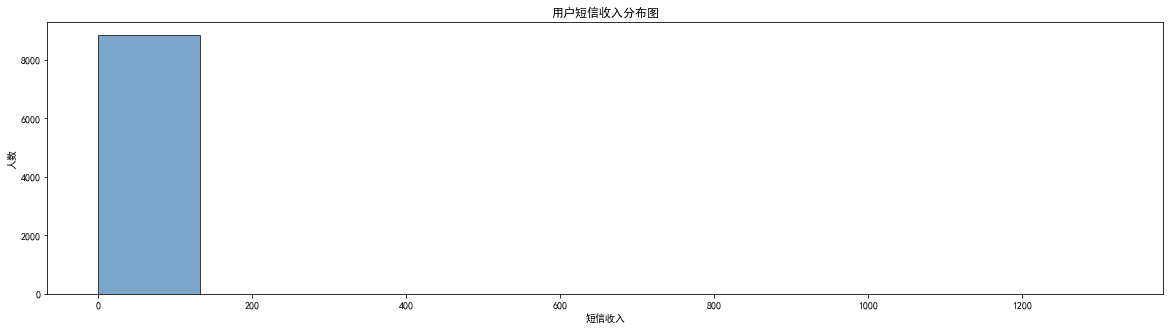

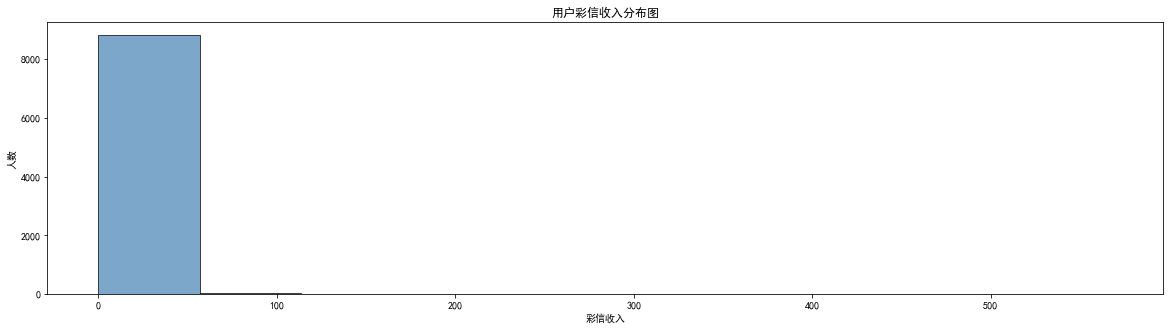

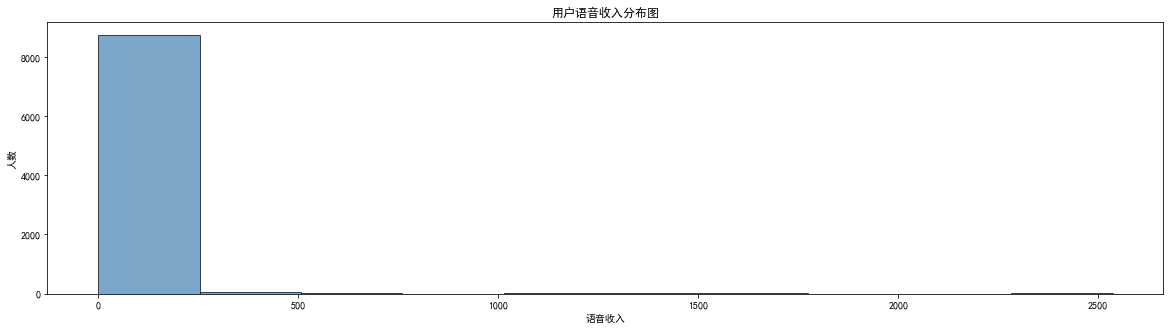

In [14]:
#2.1.1 查看各连续变量的分布: 
##年龄
plt.figure(figsize=(20,5))
plt.hist(target_data['年龄'], bins=40, facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("年龄")
plt.ylabel("人数") 
plt.title("用户年龄分布图")
plt.show()

##在网时长
plt.figure(figsize=(20,5))
plt.hist(target_data['在网时长'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("在网时长")
plt.ylabel("人数") 
plt.title("用户在网时长分布图")
plt.show()

##上网流量使用
plt.figure(figsize=(20,5))
plt.hist(target_data['上网流量使用'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("上网流量使用")
plt.ylabel("人数") 
plt.title("用户使用上网流量使用分布图")
plt.show()

##漫游流量使用
plt.figure(figsize=(20,5))
plt.hist(target_data['漫游流量使用'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("漫游流量使用")
plt.ylabel("人数") 
plt.title("用户使用漫游流量使用分布图")
plt.show()

##总收入
plt.figure(figsize=(20,5))
plt.hist(target_data['总收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("总收入")
plt.ylabel("人数") 
plt.title("用户总收入分布图")
plt.show()

##增值收入
plt.figure(figsize=(20,5))
plt.hist(target_data['增值收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("增值收入")
plt.ylabel("人数") 
plt.title("用户增值收入分布图")
plt.show()

##流量收入
plt.figure(figsize=(20,5))
plt.hist(target_data['流量收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("流量收入")
plt.ylabel("人数") 
plt.title("用户流量收入分布图")
plt.show()

##短信收入
plt.figure(figsize=(20,5))
plt.hist(target_data['短信收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("短信收入")
plt.ylabel("人数") 
plt.title("用户短信收入分布图")
plt.show()

##彩信收入
plt.figure(figsize=(20,5))
plt.hist(target_data['彩信收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("彩信收入")
plt.ylabel("人数") 
plt.title("用户彩信收入分布图")
plt.show()

##语音收入
plt.figure(figsize=(20,5))
plt.hist(target_data['语音收入'], facecolor="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("语音收入")
plt.ylabel("人数") 
plt.title("用户语音收入分布图")
plt.show()

## 2.2 缺失值与较小值处理

In [15]:
#2.2.1 缺失数据清理
## 删除所有缺失值
target_data=target_data.dropna()
print("清理后 row:",target_data.shape[0],"column:",target_data.shape[1])
print(list(target_data))

清理后 row: 7792 column: 22
['用户ID', '性别', '年龄', '归属地', '在网时长', '换机频率', '终端品牌', '终端类型', '最近使用操作系统偏好', '入网渠道类型', '渠道类型描述', '上网流量使用', '漫游流量使用', '总收入', '增值收入', '流量收入', '短信收入', '彩信收入', '语音收入', '是否欠费', '产品大类', '产品分类']


In [16]:
#2.2.2 较小数据处理
## 用户ID：无信息含量，因此删除
target_data = target_data.drop(['用户ID'],axis=1)

##性别：删去无法区分
target_data = target_data.drop((target_data[target_data['性别']=='无法区分']).index,axis=0)

##终端品牌：将人数1-5归为稀有品牌 人数6-10归为小众品牌，其余保持不变
group_brand=target_data.groupby(['终端品牌']).size()

group_brand1=group_brand[group_brand<=5]
list_brand1=group_brand1.index.tolist()
target_data.loc[target_data['终端品牌'].str.contains('|'.join(list_brand1)),'终端品牌'] = '稀有品牌'

group_brand2=group_brand[group_brand>5]
list_brand2=group_brand2[group_brand2<=10].index.tolist()
target_data.loc[target_data['终端品牌'].str.contains('|'.join(list_brand2)),'终端品牌'] = '小众品牌'

##终端类型：去掉0
target_data = target_data.drop((target_data[target_data['终端类型']=='0']).index,axis=0)

##最近使用操作系统偏好：只考虑Android,IOS
target_data.loc[target_data['最近使用操作系统偏好'].str.contains("IOS"),'最近使用操作系统偏好'] = 'IOS'
target_data.loc[target_data['最近使用操作系统偏好'].str.contains("ANDROID"),'最近使用操作系统偏好'] = 'ANDROID'
target_data.loc[target_data['最近使用操作系统偏好'].str.contains("WINDOWS"),'最近使用操作系统偏好'] = 'Others'
target_data.loc[target_data['最近使用操作系统偏好'].str.contains("BLACKBERRY"),'最近使用操作系统偏好'] = 'Others'
target_data=target_data.drop((target_data[target_data['最近使用操作系统偏好']=="Others"]).index,axis=0)

##入网渠道类型：由于入网渠道和渠道类型描述的描述对象相同，因此只保留渠道类型描述
target_data = target_data.drop(['入网渠道类型'],axis=1)

##渠道类型描述：不考虑其他渠道
target_data = target_data.drop((target_data[target_data['渠道类型描述']=='其他渠道']).index,axis=0)

## 产品分类：将人数1-5归为稀有套餐 人数6-10归为小众套餐，其余保持不变
group_package=target_data.groupby(['产品分类']).size()

group_package1=group_package[group_package<=5]
list_package1=group_package1.index.tolist()
target_data.loc[target_data['产品分类'].str.contains('|'.join(list_package1)),'产品分类'] = '稀有套餐'

group_package2=group_package[group_package>5]
list_package2=group_package2[group_package2<=10].index.tolist()
target_data.loc[target_data['产品分类'].str.contains('|'.join(list_package2)),'产品分类'] = '小众套餐'

print("清理后 row:",target_data.shape[0],"column:",target_data.shape[1])
print(list(target_data))

清理后 row: 7666 column: 20
['性别', '年龄', '归属地', '在网时长', '换机频率', '终端品牌', '终端类型', '最近使用操作系统偏好', '渠道类型描述', '上网流量使用', '漫游流量使用', '总收入', '增值收入', '流量收入', '短信收入', '彩信收入', '语音收入', '是否欠费', '产品大类', '产品分类']


## 2.3 总体数据集

In [17]:
#2.3.1 数据属性分类
nominal = ['性别', '归属地', '换机频率', '终端品牌', '终端类型', '最近使用操作系统偏好', 
           '渠道类型描述', '是否欠费', '产品大类', '产品分类']
interval =['年龄','在网时长','上网流量使用','漫游流量使用',
           '总收入','增值收入','流量收入','短信收入','彩信收入','语音收入']

variable = nominal + interval

dis_X = target_data[nominal]
con_X = target_data[interval]

##(a) 朴素贝叶斯所需数据
###需要离散化数据，我们按照分位点进行离散化处理
con_X_dis = con_X
###观察分位数可见，“漫游流量使用”和“彩信收入”的min和25%分位点重合，且分别与“上网流量使用”和“短信收入”相关性强，选择删去
con_X_dis.describe()
con_X_dis = con_X_dis.drop(['漫游流量使用','彩信收入'],axis=1)
columns = con_X_dis.columns
###其他所有连续变量按照分位点进行离散化处理
for column in columns:
    con_X_dis[column] = pd.qcut(con_X_dis[column],[0,0.25,0.5,0.75,1])

###汇总所有离散化变量，进行因子化
all_dis_X = pd.concat([dis_X,con_X_dis],axis=1)
all_fac_X = all_dis_X
columns = all_fac_X.columns
for column in columns:
    all_fac_X[column] = pd.factorize(all_fac_X[column])[0]
    
##(b) 神经网络，支持向量机与最近邻所需数据：处理以保证在一个数量级
###使用one-hot编码因子变量
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
dis_X_onehot = onehot.fit_transform(dis_X)
dis_X_onehot=pd.DataFrame(onehot.fit_transform(dis_X), columns=onehot.get_feature_names(dis_X.columns))

###将数据映射到0，1之间 且不改变分布
scaler = MinMaxScaler()
con_X_scale = scaler.fit_transform(con_X)
con_X_scale = pd.DataFrame(con_X_scale, columns=con_X.columns)

ml_data = pd.concat([dis_X_onehot,con_X_scale],axis=1)

##(c) 随机森林与回归所需数据：target_data
for column in nominal:
    target_data[column] = pd.factorize(target_data[column])[0]

# 3. 问题研究

## 3.1 总收入

### 3.1.1 数据集

In [18]:
#其他数据集
X1=target_data.drop(['总收入','增值收入', '流量收入', '短信收入', '彩信收入', '语音收入'],axis=1)
y1=target_data['总收入']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1,test_size = 0.3,random_state = 10)

### 3.1.2 训练模型

In [19]:
#随机森林
##(a)调参: 两个主要参数：n_estimators: 多少树 max_features: 每个树随机选择多少特征
###第二，三，四，五题都会用这个调参函数，比较不同参数预测结果的neg_log_loss,选择最优的参数(score最大的)
kflod = KFold(n_splits=10, shuffle = True,random_state=7)

n_estimators = [50,100,200,400]
max_features= np.arange(3,X1_train.shape[1],3)
param_grid = dict(n_estimators=n_estimators,max_features=max_features)

grid_search = GridSearchCV(RandomForestRegressor(),param_grid,scoring = 'neg_mean_squared_error',n_jobs = -1,cv = kflod)
grid_result = grid_search.fit(X1_train, y1_train)
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
rfr1=RandomForestRegressor(max_features=best.iloc[0,0],n_estimators=best.iloc[0,1])
rfr1.fit(X1_train,y1_train)

Best: -21056.961449 using {'max_features': 3, 'n_estimators': 400}


RandomForestRegressor(max_features=3, n_estimators=400)

In [20]:
#线性回归
## (a) 变量选择
"""
AIC准则，向前回归
"""
variate = ['C(性别)', '年龄', 'C(归属地)', '在网时长', 'C(换机频率)', 'C(终端品牌)', 'C(终端类型)', 
           'C(最近使用操作系统偏好)', 'C(渠道类型描述)', '上网流量使用', '漫游流量使用', 'C(是否欠费)',
           'C(产品大类)', 'C(产品分类)']
selected = []
current_score, best_new_score = float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
train_1 = X1_train.copy()
train_1['总收入'] = y1_train

#向前添加循环筛选变量
while variate:
    aic_with_variate = []
    for candidate in variate:  #逐个遍历自变量
        formula = "{} ~ {}".format('总收入', " + ".join(selected + [candidate]))  #将自变量名连接起来
        aic = smf.ols(formula, train_1).fit().aic  #利用ols训练模型得出aic值
        aic_with_variate.append((aic,candidate))  #将第每一次的aic值放进空列表
    aic_with_variate.sort(reverse=True)  #降序排序aic值
    best_new_score,best_candidate = aic_with_variate.pop()  #最好的aic值等于列表的最后一个值，以及最好的自变量等于列表最后一个自变量
    if current_score > best_new_score:  #如果目前的aic值大于最好的aic值
        variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
        selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
        current_score = best_new_score  #最新的分数等于最好的分数
    else:
        break
formula = "{} ~ {}".format('总收入', " + ".join(selected))  #最终的模型式子
print("final formula is {}".format(formula))

## (b) 模型拟合
lm1 = smf.ols(formula, train_1).fit()

final formula is 总收入 ~ C(产品分类) + 上网流量使用 + C(最近使用操作系统偏好) + C(归属地) + 在网时长 + C(终端类型) + C(是否欠费) + 年龄


### 3.1.3 模型预测

In [21]:
#模型预测
##随机森林
y1_test_predict_rf=rfr1.predict(X1_test)

##线性回归
y1_test_predict_lm = lm1.predict(X1_test)

In [22]:
#误差比较
##随机森林
rmse_rf = np.sqrt(mean_squared_error(y1_test, y1_test_predict_rf))
mae_rf=mean_absolute_error(y1_test, y1_test_predict_rf)
print("Random Forest: rmse:",rmse_rf,"mae:",mae_rf)

##线性回归
rmse_regression = np.linalg.norm(y1_test - y1_test_predict_lm, ord=2) / len(y1_test)**0.5
mae_regression = np.linalg.norm(y1_test - y1_test_predict_lm, ord=1) / len(y1_test)
print('Linear Regression: rmse:%s; mae:%s'%(rmse_regression, mae_regression))

Random Forest: rmse: 104.12422218907268 mae: 55.88684233695651
Linear Regression: rmse:115.33038879693058; mae:65.7143143980924


## 3.2 是否欠费

### 3.2.1 数据集

In [23]:
#(a) 朴素贝叶斯数据集
X2_mnb=all_fac_X.drop(['是否欠费'],axis=1)
y2_mnb=target_data['是否欠费']
X2_train_mnb,X2_test_mnb,y2_train_mnb,y2_test_mnb = train_test_split(X2_mnb, y2_mnb,test_size = 0.3,random_state = 10)

#(b)神经网络，支持向量机与最近邻所需数据
X2_ml=ml_data.drop(['是否欠费_是'],axis=1)
X2_ml=X2_ml.drop(['是否欠费_否'],axis=1)
y2_ml=target_data['是否欠费']
X2_train_ml,X2_test_ml,y2_train_ml,y2_test_ml = train_test_split(X2_ml, y2_ml,test_size = 0.3,random_state = 10)

#(c) 随机森林与回归数据集
X2=target_data.drop(['是否欠费'],axis=1)
y2=target_data['是否欠费']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2,test_size = 0.3,random_state = 10)

In [24]:
sum(y2_train==0)/len(y2_train)

0.8902348117778606

### 3.2.2 训练模型

In [25]:
#随机森林
##(a)调参函数：两个主要参数：n_estimators: 多少树 max_features: 每个树随机选择多少特征
###第二，三，四，五题都会用这个调参函数，比较不同参数预测结果的neg_log_loss,选择最优的参数(score最大的)
def RandomForestParameters(X_train,y_train):
    kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
    n_estimators = [50,100,200,400]
    max_features= np.arange(3,X_train.shape[1],3)
    param_grid = dict(n_estimators=n_estimators,max_features=max_features)
    grid_search = GridSearchCV(RandomForestClassifier(),param_grid,scoring = 'neg_log_loss',n_jobs = -1,cv = kflod)
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
    return grid_search
        
##(b) 调参
grid_search=RandomForestParameters(X2_train,y2_train)

##(c) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
rfc2=RandomForestClassifier(max_features=best.iloc[0,0],n_estimators=best.iloc[0,1])
rfc2.fit(X2_train,y2_train)

Best: -0.299442 using {'max_features': 3, 'n_estimators': 400}


RandomForestClassifier(max_features=3, n_estimators=400)

In [26]:
#朴素贝叶斯
##(a) 模型拟合
mnb2 = MultinomialNB()
mnb2.fit(X2_train_mnb, y2_train_mnb)

MultinomialNB()

In [27]:
#神经网络：我们在PyTorch框架下面进行网络的搭建及运算
##需要调节的参数：batch_size=[200,500,1000], 神经元个数=[16,32,64,128]
## 学习率=[0.01,0.005，0.001,0.0005，0.0001,0.00005，0.00001] 再微调，epoch=[10,20,30,40,50,60]
##调参策略，第一调到最优后选择下一个进行调参，并不进行网格搜索
##(a) 数据形式调整并进行小批次数据训练(批训练)：每次选择1000数据集进行拟合，避免局部最优
X2_train_nn=torch.FloatTensor(X2_train_ml.values)
X2_test_nn=torch.FloatTensor(X2_test_ml.values)
y2_train_nn=torch.LongTensor(y2_train_ml.values)
y2_test_nn=torch.LongTensor(y2_test_ml.values)

BATCH_SIZE=1000

torch_dataset=Data.TensorDataset(X2_train_nn,y2_train_nn)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, #shuffle: 可以选择是否打乱数据顺序
    num_workers=2 #多线程，提取更有效率
)    

##(b) 模型建立：我们采用了输入层+两层隐藏层+输出层，的三层神经网络
##确定三层隐藏层的个数：我们比较32，64 逐一变化，择取最优
net2=torch.nn.Sequential(
    torch.nn.Linear(X2_train_nn.shape[1],32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,2)
)

##(c) 训练网络：优化器：采用了Adam而不是简单的SGD，主要也是避免局部最优的问题
###分类问题我们采用了普遍使用的交叉熵损失损失，但是与普遍的交叉熵相比，由于数据过于不平衡，因此我们增加了占比较少的数据的损失权重
optimizer=torch.optim.Adam(net2.parameters(),lr=0.001) #在0.001-0.005之间每0.001计算一遍
weight=torch.from_numpy(np.array([0.4, 0.6])).float() #解决数据的不平衡
loss_func=torch.nn.CrossEntropyLoss(weight=weight)

for epoch in range(30):
    for step, (batch_x, batch_y) in enumerate(loader): # 施加索引
        out=net2(batch_x)
        loss=loss_func(out,batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [28]:
#最近邻分类：这里主要需要确定n_neighbors,我们也是比较n_neighbors=3，5，7，9情况下neg_log_loss
def KNNParameters(X_train,y_train):
    kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
    n_neighbors = [3,5,7,9]
    param_grid = dict(n_neighbors=n_neighbors)
    grid_search = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid,scoring = 'neg_log_loss',n_jobs = -1,cv = kflod)
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
    return grid_search
        
##(b) 调参
grid_search=KNNParameters(X2_train_ml,y2_train_ml)

##(c) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
knn2 = neighbors.KNeighborsClassifier(n_neighbors=best.iloc[0,0])
knn2.fit(X2_train_ml, y2_train_ml)

Best: -1.186348 using {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

In [29]:
#逻辑回归：这里主要也是需要对变量进行筛选
## (a) 变量选择函数：由于数据非常不平衡，因此我们使用auc作为标准进行衡量
"""
AIC准则，向前回归
"""
def LogitVariables(X_train,y_train):
    variate=X_train.columns.tolist()
    selected = []
    current_score, best_new_score = float(0),float(0)  #比较accuracy
    
    #向前添加循环筛选变量
    while variate:
        auc_with_variate = []
        for candidate in variate:  #逐个遍历自变量
            try_variate=selected + [candidate]  #将自变量名连接起来
            try_data=X_train.loc[:,try_variate] #将自变量名连接起来:选择对应数据集
            logit = LogisticRegression().fit(try_data, y_train)  #fit data
            y_score = logit.predict_proba(try_data)[:,1]
            fpr,tpr,threshold = metrics.roc_curve(y_train, y_score)
            roc_auc = metrics.auc(fpr,tpr)
            auc_with_variate.append((roc_auc,candidate))  #将第每一次的auc值放进空列表
        auc_with_variate.sort()  #升序排序accuracy值
        best_new_score,best_candidate = auc_with_variate.pop()  #最好的auc值等于列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score < best_new_score:  #如果目前的auc值小于最好的auc值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score = best_new_score  #最新的分数等于最好的分数
        else:
            break
    print("选择使用的变量 {}".format(selected))
    return selected

##(b) 变量选择
X2_train_selected=LogitVariables(X2_train,y2_train)

##(c)模型拟合
logit2 = LogisticRegression().fit(X2_train.loc[:,X2_train_selected], y2_train)

选择使用的变量 ['语音收入', '归属地', '渠道类型描述', '产品分类', '彩信收入', '流量收入', '产品大类', '总收入', '增值收入', '终端品牌']


In [30]:
#支持向量机
##(a) 调参函数:使用网格搜索法最佳C值和核函数
def SVMParameters(X_train,y_train,decision=0):
    kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
    kernel= ['rbf','linear','poly','sigmoid']
    C=[0.1,0.5,1,2,5]
    param_grid = dict(kernel=kernel,C=C)
    grid_search = GridSearchCV(svm.SVC(probability=True),param_grid,scoring = 'neg_log_loss',n_jobs = -1,cv = kflod)
    grid_result = grid_search.fit(X_train, y_train)
    print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
    return grid_search

##(b) 调参
grid_search=SVMParameters(X2_train_ml,y2_train_ml)

##(c) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
svm2 = svm.SVC(C=best.iloc[0,0],kernel=best.iloc[0,1],probability=True)
svm2.fit(X2_train_ml, y2_train_ml)

Best: -0.328268 using {'C': 5, 'kernel': 'poly'}


SVC(C=5, kernel='poly', probability=True)

### 3.2.3 模型预测

In [31]:
#模型预测
##随机森林
y2_test_predict_rf=rfc2.predict(X2_test)

##朴素贝叶斯
y2_test_predict_mnb = mnb2.predict(X2_test_mnb)

##神经网络
y2_test_predict_nn=torch.max(F.softmax(net2(X2_test_nn),dim=1),1)[1]

##最近邻分类
y2_test_predict_knn = knn2.predict(X2_test_ml)

##逻辑回归
y2_test_predict_logit = logit2.predict(X2_test.loc[:,X2_train_selected])

##支持向量机
y2_test_predict_svm=svm2.predict(X2_test_ml)

In [32]:
##准确度,查准率，查全率
###(a) 函数
def report_table(y_test,y_test_mnb,y_test_ml,y_test_predict_rf,y_test_predict_mnb,y_test_predict_nn,y_test_predict_knn,y_test_predict_logit,y_test_predict_svm):
    a_rf=metrics.accuracy_score(y_test, y_test_predict_rf)
    a_mnb=metrics.accuracy_score(y_test_mnb, y_test_predict_mnb)
    a_nn=metrics.accuracy_score(y_test_ml, y_test_predict_nn)
    a_knn=metrics.accuracy_score(y_test_ml, y_test_predict_knn)
    a_logit=metrics.accuracy_score(y_test, y_test_predict_logit)
    a_svm=metrics.accuracy_score(y_test_ml, y_test_predict_svm)
    a=[a_rf,a_mnb,a_nn,a_knn,a_logit,a_svm]
    
    p_rf_y=metrics.precision_score(y_test, y_test_predict_rf,pos_label=0)
    p_mnb_y=metrics.precision_score(y_test_mnb, y_test_predict_mnb,pos_label=0)
    p_nn_y=metrics.precision_score(y_test_ml, y_test_predict_nn,pos_label=0)
    p_knn_y=metrics.precision_score(y_test_ml, y_test_predict_knn,pos_label=0)
    p_logit_y=metrics.precision_score(y_test, y_test_predict_logit,pos_label=0)
    p_svm_y=metrics.precision_score(y_test_ml, y_test_predict_svm,pos_label=0)
    p_y=[p_rf_y,p_mnb_y,p_nn_y,p_knn_y,p_logit_y,p_svm_y]
    
    p_rf_n=metrics.precision_score(y_test, y_test_predict_rf,pos_label=1)
    p_mnb_n=metrics.precision_score(y_test_mnb, y_test_predict_mnb,pos_label=1)
    p_nn_n=metrics.precision_score(y_test_ml, y_test_predict_nn,pos_label=1)
    p_knn_n=metrics.precision_score(y_test_ml, y_test_predict_knn,pos_label=1)
    p_logit_n=metrics.precision_score(y_test, y_test_predict_logit,pos_label=1)
    p_svm_n=metrics.precision_score(y_test_ml, y_test_predict_svm,pos_label=1)
    p_n=[p_rf_n,p_mnb_n,p_nn_n,p_knn_n,p_logit_n,p_svm_n]

    r_rf_y=metrics.recall_score(y_test, y_test_predict_rf,pos_label=0)
    r_mnb_y=metrics.recall_score(y_test_mnb, y_test_predict_mnb,pos_label=0)
    r_nn_y=metrics.recall_score(y_test_ml, y_test_predict_nn,pos_label=0)
    r_knn_y=metrics.recall_score(y_test_ml, y_test_predict_knn,pos_label=0)
    r_logit_y=metrics.recall_score(y_test, y_test_predict_logit,pos_label=0)
    r_svm_y=metrics.recall_score(y_test_ml, y_test_predict_svm,pos_label=0)
    r_y=[r_rf_y,r_mnb_y,r_nn_y,r_knn_y,r_logit_y,r_svm_y]
    
    r_rf_n=metrics.recall_score(y_test, y_test_predict_rf,pos_label=1)
    r_mnb_n=metrics.recall_score(y_test_mnb, y_test_predict_mnb,pos_label=1)
    r_nn_n=metrics.recall_score(y_test_ml, y_test_predict_nn,pos_label=1)
    r_knn_n=metrics.recall_score(y_test_ml, y_test_predict_knn,pos_label=1)
    r_logit_n=metrics.recall_score(y_test, y_test_predict_logit,pos_label=1)
    r_svm_n=metrics.recall_score(y_test_ml, y_test_predict_svm,pos_label=1)
    r_n=[r_rf_n,r_mnb_n,r_nn_n,r_knn_n,r_logit_n,r_svm_n]
    
    m=['随机森林','朴素贝叶斯','神经网络','最近邻','逻辑回归','支持向量机']
    return (a,p_y,p_n,r_y,r_n,m) 

###(b) 报告
table=report_table(y2_test,y2_test_mnb,y2_test_ml,y2_test_predict_rf,y2_test_predict_mnb,y2_test_predict_nn,y2_test_predict_knn,y2_test_predict_logit,y2_test_predict_svm)
report={"准确度":table[0],"查准率(是)":table[1],"查准率(否)":table[2],"查全率(是)":table[3],"查全率(否)":table[4]}
report=pd.DataFrame(report,index=table[5])
report

,准确度,查准率(是),查准率(否),查全率(是),查全率(否)
随机森林,0.910435,0.918714,0.606557,0.988467,0.168950
朴素贝叶斯,0.853478,0.927451,0.273077,0.909178,0.324201
神经网络,0.908696,0.910487,0.714286,0.997117,0.068493
最近邻,0.900870,0.917154,0.443038,0.978856,0.159817
逻辑回归,0.904348,0.904741,0.000000,0.999519,0.000000
支持向量机,0.901739,0.913140,0.436364,0.985103,0.109589


In [33]:
#混淆矩阵
##(a) 构建绘制混淆矩阵的函数
def plot_cm(y_test_predict_rf,y_test_predict_mnb,y_test_predict_nn,y_test_predict_knn,y_test_predict_logit,y_test_predict_svm,y_test_real,y_test_real_mnb,y_test_real_ml):
    ##随机森林
    cm_rf= pd.crosstab(y_test_predict_rf,y_test_real)
    cm_rf.index.name="随机森林预测"
    display(cm_rf)
      
    ##朴素贝叶斯
    cm_mnb = pd.crosstab(y_test_predict_mnb,y_test_real_mnb)
    cm_mnb.index.name="朴素贝叶斯预测"
    display(cm_mnb)
    
    ##神经网络
    cm_nn= pd.crosstab(y_test_predict_nn,y_test_real_ml)
    cm_nn.index.name="神经网络预测"
    display(cm_nn)
    
    ##最近邻分类
    cm_knn= pd.crosstab(y_test_predict_knn,y_test_real_ml)
    cm_knn.index.name="最近邻预测"
    display(cm_knn)
    
    ##逻辑回归
    cm_logit= pd.crosstab(y_test_predict_logit, y_test_real)
    cm_logit.index.name="逻辑回归预测"
    display(cm_logit)
    
    ##支持向量机
    cm_svm= pd.crosstab(y_test_predict_svm, y_test_real_ml)
    cm_svm.index.name="支持向量机预测"
    display(cm_svm)   
    
##(b) 绘制混淆矩阵
plot_cm(y2_test_predict_rf,y2_test_predict_mnb,y2_test_predict_nn,y2_test_predict_knn,y2_test_predict_logit,y2_test_predict_svm,y2_test,y2_test_mnb,y2_test_ml)

是否欠费,0,1
随机森林预测,,
0,2057,182
1,24,37


是否欠费,0,1
朴素贝叶斯预测,,
0,1892,148
1,189,71


是否欠费,0,1
神经网络预测,,
0,2075,204
1,6,15


是否欠费,0,1
最近邻预测,,
0,2037,184
1,44,35


是否欠费,0,1
逻辑回归预测,,
0,2080,219
1,1,0


是否欠费,0,1
支持向量机预测,,
0,2050,195
1,31,24


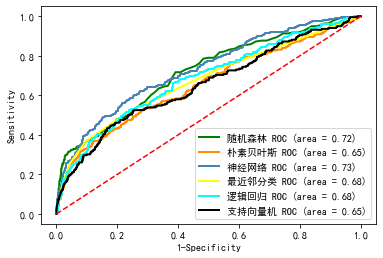

In [147]:
# ROC
##函数
def plot_roc(rfc,mnb,net,knn,logit,svm,X_test,X_test_mnb,X_test_nn,X_test_ml,y_test,y_test_mnb,y_test_nn,y_test_ml,X_train_selected):
    ##(a) 计算正例的预测概率，用于生成ROC曲线的数据
    ### 随机森林
    y_score_rf = rfc.predict_proba(X_test)[:,1]
    fpr_rf,tpr_rf,threshold_rf = metrics.roc_curve(y_test, y_score_rf)
    roc_auc_rf = metrics.auc(fpr_rf,tpr_rf)

    ###朴素贝叶斯
    y_score_mnb = mnb.predict_proba(X_test_mnb)[:,1]
    fpr_mnb,tpr_mnb,threshold_mnb = metrics.roc_curve(y_test_mnb, y_score_mnb)
    roc_auc_mnb = metrics.auc(fpr_mnb,tpr_mnb)
    
    ###神经网络
    y_score_nn = F.softmax(net(X_test_nn),dim=1)[:,1].detach().numpy()
    fpr_nn,tpr_nn,threshold_nn = metrics.roc_curve(y_test_nn, y_score_nn)
    roc_auc_nn = metrics.auc(fpr_nn,tpr_nn)
    
    ###最近邻分类
    y_score_knn = knn.predict_proba(X_test_ml)[:,1]
    fpr_knn,tpr_knn,threshold_knn = metrics.roc_curve(y_test_ml, y_score_knn)
    roc_auc_knn = metrics.auc(fpr_knn,tpr_knn)
    
    ###逻辑回归
    y_score_logit = logit.predict_proba(X_test.loc[:,X_train_selected])[:,1]
    fpr_logit,tpr_logit,threshold_logit = metrics.roc_curve(y_test, y_score_logit)
    roc_auc_logit = metrics.auc(fpr_logit,tpr_logit)
    
    ###支持向量机
    y_score_svm = svm.predict_proba(X_test_ml)[:,1]
    fpr_svm,tpr_svm,threshold_svm = metrics.roc_curve(y_test_ml, y_score_svm)
    roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)

    ##(b) 绘制面积图
    ###随机森林
    plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='随机森林 ROC (area = %0.2f)' % roc_auc_rf)
    plt.plot(fpr_mnb, tpr_mnb, color='darkorange', lw=2, label='朴素贝叶斯 ROC (area = %0.2f)' % roc_auc_mnb)
    plt.plot(fpr_nn, tpr_nn, color='steelblue', lw=2, label='神经网络 ROC (area = %0.2f)' % roc_auc_nn)
    plt.plot(fpr_knn, tpr_knn, color='yellow', lw=2, label='最近邻分类 ROC (area = %0.2f)' % roc_auc_knn)
    plt.plot(fpr_logit, tpr_logit, color='aqua', lw=2, label='逻辑回归 ROC (area = %0.2f)' % roc_auc_logit)
    plt.plot(fpr_svm, tpr_svm, color='black', lw=2, label='支持向量机 ROC (area = %0.2f)' % roc_auc_svm)
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.legend(loc="lower right")
    plt.show()

##绘制
plot_roc(rfc2,mnb2,net2,knn2,logit2,svm2,X2_test,X2_test_mnb,X2_test_nn,X2_test_ml,y2_test,y2_test_mnb,y2_test_nn,y2_test_ml,X2_train_selected)

## 3.3 终端类型

### 3.3.1 数据集

In [35]:
#(a) 朴素贝叶斯数据集
X3_mnb=all_fac_X.drop(['终端类型'],axis=1)
y3_mnb=target_data['终端类型']
X3_train_mnb,X3_test_mnb,y3_train_mnb,y3_test_mnb = train_test_split(X3_mnb, y3_mnb,test_size = 0.3,random_state = 10)

#(b)神经网络，支持向量机与最近邻所需数据
X3_ml=ml_data.drop(['终端类型_2G'],axis=1)
X3_ml=X3_ml.drop(['终端类型_3G'],axis=1)
X3_ml=X3_ml.drop(['终端类型_4G'],axis=1)
y3_ml=target_data['终端类型']
X3_train_ml,X3_test_ml,y3_train_ml,y3_test_ml = train_test_split(X3_ml, y3_ml,test_size = 0.3,random_state = 10)

#(c) 随机森林与回归数据集
X3=target_data.drop(['终端类型'],axis=1)
y3=target_data['终端类型']
X3_train,X3_test,y3_train,y3_test = train_test_split(X3, y3,test_size = 0.3,random_state = 10)

In [36]:
sum(y3_train==0)/len(y3_train)

0.6690272083488632

### 3.3.2 训练模型

In [37]:
#随机森林
##(a) 调参
grid_search=RandomForestParameters(X3_train,y3_train)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
rfc3=RandomForestClassifier(max_features=best.iloc[0,0],n_estimators=best.iloc[0,1])
rfc3.fit(X3_train,y3_train)

Best: -0.660556 using {'max_features': 6, 'n_estimators': 400}


RandomForestClassifier(max_features=6, n_estimators=400)

In [38]:
#朴素贝叶斯
mnb3 = MultinomialNB()
mnb3.fit(X3_train_mnb, y3_train_mnb)

MultinomialNB()

In [39]:
#神经网络
##(a) 数据形式调整并进行小批次数据训练
X3_train_nn=torch.FloatTensor(X3_train_ml.values)
X3_test_nn=torch.FloatTensor(X3_test_ml.values)
y3_train_nn=torch.LongTensor(y3_train_ml.values)
y3_test_nn=torch.LongTensor(y3_test_ml.values)

BATCH_SIZE=1000

torch_dataset=Data.TensorDataset(X3_train_nn,y3_train_nn)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, #shuffle: 可以选择是否打乱数据顺序
    num_workers=2 #多线程，提取更有效率
)    

##(b) 模型建立
net3=torch.nn.Sequential(
    torch.nn.Linear(X3_train_nn.shape[1],32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,3)
)

##(c) 训练网络
optimizer=torch.optim.Adam(net3.parameters(),lr=0.001)
loss_func=torch.nn.CrossEntropyLoss()

for epoch in range(40):
    for step, (batch_x, batch_y) in enumerate(loader): # 施加索引
        out=net3(batch_x)
        loss=loss_func(out,batch_y)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [40]:
#最近邻分类
grid_search=KNNParameters(X3_train_ml,y3_train_ml)

##(c) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
knn3 = neighbors.KNeighborsClassifier(n_neighbors=best.iloc[0,0])
knn3.fit(X3_train_ml, y3_train_ml)

Best: -1.798208 using {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

In [41]:
#支持向量机
##(a) 调参
grid_search=SVMParameters(X3_train_ml,y3_train_ml)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
svm3 = svm.SVC(C=best.iloc[0,0],kernel=best.iloc[0,1],probability=True)
svm3.fit(X3_train_ml, y3_train_ml)

Best: -0.703078 using {'C': 2, 'kernel': 'rbf'}


SVC(C=2, probability=True)

### 3.3.3 模型预测

In [42]:
#模型预测
##随机森林
y3_test_predict_rf=rfc3.predict(X3_test)

##朴素贝叶斯
y3_test_predict_mnb=mnb3.predict(X3_test_mnb)

##神经网络
y3_test_predict_nn=torch.max(F.softmax(net3(X3_test_nn),dim=1),1)[1]

##最近邻分类
y3_test_predict_knn=knn3.predict(X3_test_ml)

##支持向量机
y3_test_predict_svm=svm3.predict(X3_test_ml)

In [43]:
##准确度,查准率，查全率
a_rf=metrics.accuracy_score(y3_test, y3_test_predict_rf)
a_mnb=metrics.accuracy_score(y3_test_mnb, y3_test_predict_mnb)
a_nn=metrics.accuracy_score(y3_test_ml, y3_test_predict_nn)
a_knn=metrics.accuracy_score(y3_test_ml, y3_test_predict_knn)
a_svm=metrics.accuracy_score(y3_test_ml, y3_test_predict_svm)
a=[a_rf,a_mnb,a_nn,a_knn,a_svm]
    
p_rf_y=metrics.precision_score(y3_test, y3_test_predict_rf,average=None)
p_mnb_y=metrics.precision_score(y3_test_mnb, y3_test_predict_mnb,average=None)
p_nn_y=metrics.precision_score(y3_test_ml, y3_test_predict_nn,average=None)
p_knn_y=metrics.precision_score(y3_test_ml, y3_test_predict_knn,average=None)
p_svm_y=metrics.precision_score(y3_test_ml, y3_test_predict_svm,average=None)

p_y=[p_rf_y[0],p_mnb_y[0],p_nn_y[0],p_knn_y[0],p_svm_y[0]]
p_n=[p_rf_y[1],p_mnb_y[1],p_nn_y[1],p_knn_y[1],p_svm_y[1]]
p_o=[p_rf_y[2],p_mnb_y[2],p_nn_y[2],p_knn_y[2],p_svm_y[2]]

r_rf_y=metrics.recall_score(y3_test, y3_test_predict_rf,average=None)
r_mnb_y=metrics.recall_score(y3_test_mnb, y3_test_predict_mnb,average=None)
r_nn_y=metrics.recall_score(y3_test_ml, y3_test_predict_nn,average=None)
r_knn_y=metrics.recall_score(y3_test_ml, y3_test_predict_knn,average=None)
r_svm_y=metrics.recall_score(y3_test_ml, y3_test_predict_svm,average=None)

r_y=[r_rf_y[0],r_mnb_y[0],r_nn_y[0],r_knn_y[0],r_svm_y[0]]
r_n=[r_rf_y[1],r_mnb_y[1],r_nn_y[1],r_knn_y[1],r_svm_y[1]]
r_o=[r_rf_y[2],r_mnb_y[2],r_nn_y[2],r_knn_y[2],r_svm_y[2]]

m=['随机森林','朴素贝叶斯','神经网络','最近邻','支持向量机']
table={"准确度":a,"查准率(2G)":p_y,"查准率(3G)":p_n,"查准率(4G)":p_o,"查全率(2G)":r_y,"查全率(3G)":r_n,"查全率(4G)":r_o}
table=pd.DataFrame(table,index=m)
table

,准确度,查准率(2G),查准率(3G),查准率(4G),查全率(2G),查全率(3G),查全率(4G)
随机森林,0.699565,0.740919,0.476440,0.552743,0.890816,0.194030,0.478102
朴素贝叶斯,0.594348,0.735117,0.396313,0.309524,0.705845,0.183369,0.664234
神经网络,0.704348,0.750000,0.497797,0.537778,0.890173,0.240938,0.441606
最近邻,0.671304,0.720711,0.398964,0.456410,0.885035,0.164179,0.324818
支持向量机,0.694783,0.727506,0.474178,0.577465,0.908799,0.215352,0.299270


In [44]:
def plot_cm2(y_test_predict_rf,y_test_predict_mnb,y_test_predict_nn,y_test_predict_knn,y_test_predict_svm,y_test_real,y_test_real_mnb,y_test_real_ml):
    ##随机森林
    cm_rf= pd.crosstab(y_test_predict_rf,y_test_real)
    cm_rf.index.name="随机森林预测"
    display(cm_rf)
      
    ##朴素贝叶斯
    cm_mnb = pd.crosstab(y_test_predict_mnb,y_test_real_mnb)
    cm_mnb.index.name="朴素贝叶斯预测"
    display(cm_mnb)
    
    ##神经网络
    cm_nn= pd.crosstab(y_test_predict_nn,y_test_real_ml)
    cm_nn.index.name="神经网络预测"
    display(cm_nn)
    
    ##最近邻分类
    cm_knn= pd.crosstab(y_test_predict_knn,y_test_real_ml)
    cm_knn.index.name="最近邻预测"
    display(cm_knn)
    
    ##支持向量机
    cm_svm= pd.crosstab(y_test_predict_svm, y_test_real_ml)
    cm_svm.index.name="支持向量机预测"
    display(cm_svm)   
    
##(b) 绘制混淆矩阵
plot_cm2(y3_test_predict_rf,y3_test_predict_mnb,y3_test_predict_nn,y3_test_predict_knn,y3_test_predict_svm,y3_test,y3_test_mnb,y3_test_ml)

终端类型,0,1,2
随机森林预测,,,
0,1387,356,129
1,86,91,14
2,84,22,131


终端类型,0,1,2
朴素贝叶斯预测,,,
0,1099,312,84
1,123,86,8
2,335,71,182


终端类型,0,1,2
神经网络预测,,,
0,1386,326,136
1,97,113,17
2,74,30,121


终端类型,0,1,2
最近邻预测,,,
0,1378,361,173
1,104,77,12
2,75,31,89


终端类型,0,1,2
支持向量机预测,,,
0,1415,354,176
1,96,101,16
2,46,14,82


## 3.4 渠道类型描述

### 3.4.1 数据集

In [45]:
#(a) 朴素贝叶斯数据集
X4_mnb=all_fac_X.drop(['渠道类型描述'],axis=1)
y4_mnb=target_data['渠道类型描述']
X4_train_mnb,X4_test_mnb,y4_train_mnb,y4_test_mnb = train_test_split(X4_mnb, y4_mnb,test_size = 0.3,random_state = 10)

#(b)神经网络，支持向量机与最近邻所需数据
X4_ml=ml_data.drop(['渠道类型描述_自有渠道'],axis=1)
X4_ml=X4_ml.drop(['渠道类型描述_社会渠道'],axis=1)
y4_ml=target_data['渠道类型描述']
X4_train_ml,X4_test_ml,y4_train_ml,y4_test_ml = train_test_split(X4_ml, y4_ml,test_size = 0.3,random_state = 10)

#(c) 随机森林与回归数据集
X4=target_data.drop(['渠道类型描述'],axis=1)
y4=target_data['渠道类型描述']
X4_train,X4_test,y4_train,y4_test = train_test_split(X4, y4,test_size = 0.3,random_state = 10)

In [46]:
sum(y4_train==0)/len(y4_train)

0.5363399180022363

### 3.4.2 训练模型

In [47]:
#随机森林
##(a) 调参
grid_search=RandomForestParameters(X4_train,y4_train)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
rfc4=RandomForestClassifier(max_features=best.iloc[0,0],n_estimators=best.iloc[0,1])
rfc4.fit(X4_train,y4_train)

Best: -0.544820 using {'max_features': 12, 'n_estimators': 200}


RandomForestClassifier(max_features=12, n_estimators=200)

In [48]:
#朴素贝叶斯
mnb4 = MultinomialNB()
mnb4.fit(X4_train_mnb, y4_train_mnb) # 基于训练数据集的拟合

MultinomialNB()

In [95]:
#神经网络
##(a) 数据形式调整并进行小批次数据训练
X4_train_nn=torch.FloatTensor(X4_train_ml.values)
X4_test_nn=torch.FloatTensor(X4_test_ml.values)
y4_train_nn=torch.LongTensor(y4_train_ml.values)
y4_test_nn=torch.LongTensor(y4_test_ml.values)

BATCH_SIZE=1000

torch_dataset=Data.TensorDataset(X4_train_nn,y4_train_nn)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, #shuffle: 可以选择是否打乱数据顺序
    num_workers=2 #多线程，提取更有效率
)    

##(b) 模型建立
net4=torch.nn.Sequential(
    torch.nn.Linear(X4_train_nn.shape[1],32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,2)
)

##(c) 训练网络
optimizer=torch.optim.Adam(net4.parameters(),lr=0.005)
loss_func=torch.nn.CrossEntropyLoss()

#定义两个数组
for epoch in range(20):
    for step, (batch_x, batch_y) in enumerate(loader): # 施加索引
        out=net4(batch_x)
        loss=loss_func(out,batch_y)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [51]:
#最近邻分类
##(a) 调参
grid_search=KNNParameters(X4_train_ml,y4_train_ml)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
knn4 = neighbors.KNeighborsClassifier(n_neighbors=best.iloc[0,0])
knn4.fit(X4_train_ml, y4_train_ml)

Best: -0.996222 using {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

In [52]:
#逻辑回归
##(a) 变量选择
X4_train_selected=LogitVariables(X4_train,y4_train)

##(b)模型拟合
logit4 = LogisticRegression().fit(X4_train.loc[:,X4_train_selected], y4_train)

选择使用的变量 ['产品大类', '在网时长', '是否欠费', '最近使用操作系统偏好', '年龄', '归属地', '终端类型', '终端品牌', '换机频率']


In [53]:
#支持向量机
##(a) 调参
grid_search=SVMParameters(X4_train_ml,y4_train_ml)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
svm4 = svm.SVC(C=best.iloc[0,0],kernel=best.iloc[0,1],probability=True)
svm4.fit(X4_train_ml, y4_train_ml)

Best: -0.595897 using {'C': 1, 'kernel': 'poly'}


SVC(C=1, kernel='poly', probability=True)

### 3.4.3 模型预测

In [96]:
#模型预测
##随机森林
y4_test_predict_rf=rfc4.predict(X4_test)

##朴素贝叶斯
y4_test_predict_mnb = mnb4.predict(X4_test_mnb)

##神经网络
y4_test_predict_nn=torch.max(F.softmax(net4(X4_test_nn),dim=1),1)[1]

##最近邻分类
y4_test_predict_knn=knn4.predict(X4_test_ml)

##逻辑回归
y4_test_predict_logit=logit4.predict(X4_test.loc[:,X4_train_selected])

##支持向量机
y4_test_predict_svm=svm4.predict(X4_test_ml)

In [97]:
##准确度,查准率，查全率
###(a) 报告
table=report_table(y4_test,y4_test_mnb,y4_test_ml,y4_test_predict_rf,y4_test_predict_mnb,y4_test_predict_nn,y4_test_predict_knn,y4_test_predict_logit,y4_test_predict_svm)
report={"准确度":table[0],"查准率(自有渠道)":table[1],"查准率(社会渠道)":table[2],"查全率(自有渠道)":table[3],"查全率(社会渠道)":table[4]}
report=pd.DataFrame(report,index=table[5])
report

,准确度,查准率(自有渠道),查准率(社会渠道),查全率(自有渠道),查全率(社会渠道)
随机森林,0.690870,0.707692,0.666310,0.755869,0.609589
朴素贝叶斯,0.578261,0.620690,0.525391,0.619718,0.526419
神经网络,0.634783,0.698730,0.575960,0.602504,0.675147
最近邻,0.658261,0.684685,0.621901,0.713615,0.589041
逻辑回归,0.600870,0.623288,0.561905,0.712050,0.461840
支持向量机,0.657391,0.689043,0.616534,0.698748,0.605675


In [98]:
#绘制混淆矩阵
plot_cm(y4_test_predict_rf,y4_test_predict_mnb,y4_test_predict_nn,y4_test_predict_knn,y4_test_predict_logit,y4_test_predict_svm,y4_test,y4_test_mnb,y4_test_ml)

渠道类型描述,0,1
随机森林预测,,
0,966,399
1,312,623


渠道类型描述,0,1
朴素贝叶斯预测,,
0,792,484
1,486,538


渠道类型描述,0,1
神经网络预测,,
0,770,332
1,508,690


渠道类型描述,0,1
最近邻预测,,
0,912,420
1,366,602


渠道类型描述,0,1
逻辑回归预测,,
0,910,550
1,368,472


渠道类型描述,0,1
支持向量机预测,,
0,893,403
1,385,619


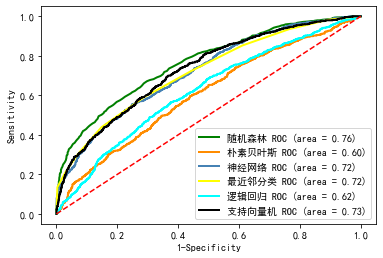

In [148]:
# ROC
plot_roc(rfc4,mnb4,net4,knn4,logit4,svm4,X4_test,X4_test_mnb,X4_test_nn,X4_test_ml,y4_test,y4_test_mnb,y4_test_nn,y4_test_ml,X4_train_selected)

## 3.5 最近使用操作系统偏好

### 3.5.1 数据集

In [58]:
#(a) 朴素贝叶斯数据集
X5_mnb=all_fac_X.drop(['最近使用操作系统偏好'],axis=1)
y5_mnb=target_data['最近使用操作系统偏好']
X5_train_mnb,X5_test_mnb,y5_train_mnb,y5_test_mnb = train_test_split(X5_mnb, y5_mnb,test_size = 0.3,random_state = 10)

#(b)神经网络，支持向量机与最近邻所需数据
X5_ml=ml_data.drop(['最近使用操作系统偏好_ANDROID'],axis=1)
X5_ml=X5_ml.drop(['最近使用操作系统偏好_IOS'],axis=1)
y5_ml=target_data['最近使用操作系统偏好']
X5_train_ml,X5_test_ml,y5_train_ml,y5_test_ml = train_test_split(X5_ml, y5_ml,test_size = 0.3,random_state = 10)

#(c) 随机森林与回归数据集
X5=target_data.drop(['最近使用操作系统偏好'],axis=1)
y5=target_data['最近使用操作系统偏好']
X5_train,X5_test,y5_train,y5_test = train_test_split(X5, y5,test_size = 0.3,random_state = 10)

In [59]:
sum(y5_train==0)/len(y5_train)

0.5838613492359299

### 3.5.2 训练模型

In [60]:
#随机森林
##(a) 调参
grid_search=RandomForestParameters(X5_train,y5_train)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
rfc5=RandomForestClassifier(max_features=best.iloc[0,0],n_estimators=best.iloc[0,1])
rfc5.fit(X5_train,y5_train)

Best: -0.010435 using {'max_features': 9, 'n_estimators': 100}


RandomForestClassifier(max_features=9)

In [61]:
#朴素贝叶斯
mnb5 = MultinomialNB()
mnb5.fit(X5_train_mnb, y5_train_mnb) # 基于训练数据集的拟合

MultinomialNB()

In [126]:
#神经网络
##(a) 数据形式调整并进行小批次数据训练
X5_train_nn=torch.FloatTensor(X5_train_ml.values)
X5_test_nn=torch.FloatTensor(X5_test_ml.values)
y5_train_nn=torch.LongTensor(y5_train_ml.values)
y5_test_nn=torch.LongTensor(y5_test_ml.values)

BATCH_SIZE=1000

torch_dataset=Data.TensorDataset(X5_train_nn,y5_train_nn)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, #shuffle: 可以选择是否打乱数据顺序
    num_workers=2 #多线程，提取更有效率
)    

##(b) 模型建立
net5=torch.nn.Sequential(
    torch.nn.Linear(X5_train_nn.shape[1],32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64,2)
)

##(c) 训练网络
optimizer=torch.optim.Adam(net5.parameters(),lr=0.001)
loss_func=torch.nn.CrossEntropyLoss()

for epoch in range(40):
    for step, (batch_x, batch_y) in enumerate(loader): # 施加索引
        out=net5(batch_x)
        loss=loss_func(out,batch_y)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [63]:
#最近邻分类
##(a) 参数确定
grid_search=KNNParameters(X5_train_ml,y5_train_ml)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
knn5 = neighbors.KNeighborsClassifier(n_neighbors=best.iloc[0,0])
knn5.fit(X5_train_ml, y5_train_ml)

Best: -0.203605 using {'n_neighbors': 9}


KNeighborsClassifier(n_neighbors=9)

In [64]:
#逻辑回归
##(a) 变量选择
X5_train_selected=LogitVariables(X5_train,y5_train)

##(b)模型拟合
logit5 = LogisticRegression().fit(X5_train.loc[:,X5_train_selected], y5_train)

选择使用的变量 ['终端品牌', '总收入', '流量收入', '短信收入', '渠道类型描述', '在网时长', '性别']


In [65]:
#支持向量机
##(a) 调参
grid_search=SVMParameters(X5_train_ml,y5_train_ml)

##(b) 模型拟合
best=pd.DataFrame(grid_search.best_params_,index=range(1))
svm5 = svm.SVC(C=best.iloc[0,0],kernel=best.iloc[0,1],probability=True)
svm5.fit(X5_train_ml, y5_train_ml)

Best: -0.002552 using {'C': 5, 'kernel': 'linear'}


SVC(C=5, kernel='linear', probability=True)

### 3.5.3 模型预测

In [128]:
#模型预测
##随机森林
y5_test_predict_rf=rfc5.predict(X5_test)

##朴素贝叶斯
y5_test_predict_mnb=mnb5.predict(X5_test_mnb)

##神经网络
y5_test_predict_nn=torch.max(F.softmax(net5(X5_test_nn),dim=1),1)[1]

##最近邻分类
y5_test_predict_knn=knn5.predict(X5_test_ml)

##逻辑回归
y5_test_predict_logit=logit5.predict(X5_test.loc[:,X5_train_selected])

##支持向量机
y5_test_predict_svm=svm5.predict(X5_test_ml)

In [129]:
##准确度,查准率，查全率
###(a) 报告
table=report_table(y5_test,y5_test_mnb,y5_test_ml,y5_test_predict_rf,y5_test_predict_mnb,y5_test_predict_nn,y5_test_predict_knn,y5_test_predict_logit,y5_test_predict_svm)
report={"准确度":table[0],"查准率(Android)":table[1],"查准率(IOS)":table[2],"查全率(Android)":table[3],"查全率(IOS)":table[4]}
report=pd.DataFrame(report,index=table[5])
report

,准确度,查准率(Android),查准率(IOS),查全率(Android),查全率(IOS)
随机森林,0.998261,0.997760,0.998959,0.999252,0.996885
朴素贝叶斯,0.836087,0.886473,0.776938,0.823485,0.853583
神经网络,0.998696,0.997761,1.000000,1.000000,0.996885
最近邻,0.941304,0.991817,0.884045,0.906507,0.989616
逻辑回归,0.996087,0.997006,0.994813,0.996260,0.995846
支持向量机,0.998696,0.997761,1.000000,1.000000,0.996885


In [130]:
#绘制混淆矩阵
plot_cm(y5_test_predict_rf,y5_test_predict_mnb,y5_test_predict_nn,y5_test_predict_knn,y5_test_predict_logit,y5_test_predict_svm,y5_test,y5_test_mnb,y5_test_ml)

最近使用操作系统偏好,0,1
随机森林预测,,
0,1336,3
1,1,960


最近使用操作系统偏好,0,1
朴素贝叶斯预测,,
0,1101,141
1,236,822


最近使用操作系统偏好,0,1
神经网络预测,,
0,1337,3
1,0,960


最近使用操作系统偏好,0,1
最近邻预测,,
0,1212,10
1,125,953


最近使用操作系统偏好,0,1
逻辑回归预测,,
0,1332,4
1,5,959


最近使用操作系统偏好,0,1
支持向量机预测,,
0,1337,3
1,0,960


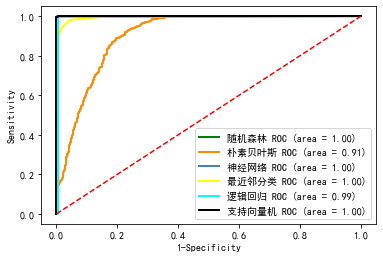

In [149]:
# ROC
plot_roc(rfc5,mnb5,net5,knn5,logit5,svm5,X5_test,X5_test_mnb,X5_test_nn,X5_test_ml,y5_test,y5_test_mnb,y5_test_nn,y5_test_ml,X5_train_selected)